In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os, sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

sys.path.append('..')
import deepomics

from deepomics import neuralnetwork as nn
from deepomics import utils, fit

# load Frey faces dataset

In [2]:
fname = '../data/FreyFaces/frey_rawface.mat'

from scipy.io import loadmat
matfile = loadmat(fname)
all_data = (matfile['ff'] / 255.).T
indices = np.arange(len(all_data))
np.random.shuffle(indices)

# split dataset into train and validation 
X_train = all_data[indices[:1500]]
X_valid = all_data[indices[1500:]]

# place data as a dictionary
train = {'inputs': X_train, 'targets': X_train}
valid = {'inputs': X_valid, 'targets': X_valid}

width = 20
height = 28
input_shape = [None, width*height]
output_shape = [None, width*height]

In [3]:
def model(input_shape, output_shape):

    # create model
    layer1 = {'layer': 'input', #41
            'input_shape': input_shape
            }
    layer2 = {'layer': 'dense',
            'num_units': 128,
            'activation': 'relu',
            #'dropout': 0.1,
            }
    layer3 = {'layer': 'variational_normal',
            'num_units': 30,
            'name': 'Z',
            }
    layer4 = {'layer': 'dense',
            'num_units': 128,
            'activation': 'relu',
            #'dropout': 0.1,
            }
    layer5 = {'layer': 'variational_normal',
            'num_units': output_shape[1],
            'activation': 'sigmoid',
            'name': 'X'
             }
    
    #from tfomics import build_network
    model_layers = [layer1, layer2, layer3, layer4, layer5]

    # optimization parameters
    optimization = {"objective": "elbo_gaussian_gaussian",
                  "optimizer": "adam",
                  "learning_rate": 0.0003,
                  "beta1": 0.9, 
                  #"l2": 1e-6,
                  }
    return model_layers, optimization


# get model info
model_layers, optimization = model(input_shape, output_shape)

# build neural network class
nnmodel = nn.NeuralNet(seed=247)
nnmodel.build_layers(model_layers, optimization, supervised=False)
nnmodel.inspect_layers()

# compile neural trainer
model_save_path = os.path.join('../results', 'frey')
nntrainer = nn.NeuralTrainer(nnmodel, save=None, file_path=model_save_path)

----------------------------------------------------------------------------
Network architecture:
----------------------------------------------------------------------------
layer1: inputs
(?, 560)
layer2: dense_0
(?, 128)
layer3: dense_0_bias
(?, 128)
layer4: dense_0_active
(?, 128)
layer5: Z_mu
(?, 30)
layer6: Z_logvar
(?, 30)
layer7: Z_sample
(?, 30)
layer8: dense_1
(?, 128)
layer9: dense_1_bias
(?, 128)
layer10: dense_1_active
(?, 128)
layer11: X_mu
(?, 560)
layer12: X_logvar
(?, 560)
layer13: X_sample
(?, 560)
layer14: X
(?, 560)
----------------------------------------------------------------------------


# Start the session

In [4]:
# initialize session
sess = utils.initialize_session()

# Train the model with KL-weight annealing  (Starts from an autoencoder and becomes a fully VAE model over time)

In [5]:
data = {'train': train, 'valid': valid}
fit.train_minibatch(sess, nntrainer, data, batch_size=128,
                    num_epochs=500, patience=20, verbose=1, shuffle=True)

Epoch 1 out of 500 
  valid loss:		378.15418
Epoch 2 out of 500 
  valid loss:		36.51479
Epoch 3 out of 500 
  valid loss:		-265.43458
Epoch 4 out of 500 
  valid loss:		-416.82175
Epoch 5 out of 500 
  valid loss:		-466.71902
Epoch 6 out of 500 
  valid loss:		-485.56165
Epoch 7 out of 500 
  valid loss:		-500.14429
Epoch 8 out of 500 
  valid loss:		-511.79305
Epoch 9 out of 500 
  valid loss:		-517.18202
Epoch 10 out of 500 
  valid loss:		-526.52657
Epoch 11 out of 500 
  valid loss:		-531.44128
Epoch 12 out of 500 
  valid loss:		-548.91519
Epoch 13 out of 500 
  valid loss:		-561.39543
Epoch 14 out of 500 
  valid loss:		-577.91066
Epoch 15 out of 500 
  valid loss:		-592.62000
Epoch 16 out of 500 
  valid loss:		-606.30125
Epoch 17 out of 500 
  valid loss:		-621.61285
Epoch 18 out of 500 
  valid loss:		-638.75519
Epoch 19 out of 500 
  valid loss:		-657.72699
Epoch 20 out of 500 
  valid loss:		-660.93683
Epoch 21 out of 500 
  valid loss:		-685.66406
Epoch 22 out of 500 
  va

  valid loss:		-1014.40562
Epoch 175 out of 500 
  valid loss:		-1014.25473
Epoch 176 out of 500 
  valid loss:		-1014.79138
Epoch 177 out of 500 
  valid loss:		-1011.79434
Epoch 178 out of 500 
  valid loss:		-1012.64957
Epoch 179 out of 500 
  valid loss:		-1015.49916
Epoch 180 out of 500 
  valid loss:		-1013.47049
Epoch 181 out of 500 
  valid loss:		-1015.16576
Epoch 182 out of 500 
  valid loss:		-1017.30852
Epoch 183 out of 500 
  valid loss:		-1018.58475
Epoch 184 out of 500 
  valid loss:		-1017.06227
Epoch 185 out of 500 
  valid loss:		-1020.56625
Epoch 186 out of 500 
  valid loss:		-1019.08252
Epoch 187 out of 500 
  valid loss:		-1013.50818
Epoch 188 out of 500 
  valid loss:		-1014.44165
Epoch 189 out of 500 
  valid loss:		-1020.81509
Epoch 190 out of 500 
  valid loss:		-1026.66737
Epoch 191 out of 500 
  valid loss:		-1019.29648
Epoch 192 out of 500 
  valid loss:		-1027.99988
Epoch 193 out of 500 
  valid loss:		-1028.41252
Epoch 194 out of 500 
  valid loss:		-1028

  valid loss:		-1076.47052
Epoch 343 out of 500 
  valid loss:		-1083.78006
Epoch 344 out of 500 
  valid loss:		-1087.87387
Epoch 345 out of 500 
  valid loss:		-1088.28342
Epoch 346 out of 500 
  valid loss:		-1086.18860
Epoch 347 out of 500 
  valid loss:		-1087.50284
Epoch 348 out of 500 
  valid loss:		-1079.18719
Epoch 349 out of 500 
  valid loss:		-1083.68060
Epoch 350 out of 500 
  valid loss:		-1088.63544
Epoch 351 out of 500 
  valid loss:		-1089.89850
Epoch 352 out of 500 
  valid loss:		-1085.75314
Epoch 353 out of 500 
  valid loss:		-1091.68185
Epoch 354 out of 500 
  valid loss:		-1092.78168
Epoch 355 out of 500 
  valid loss:		-1090.65076
Epoch 356 out of 500 
  valid loss:		-1084.59708
Epoch 357 out of 500 
  valid loss:		-1084.47891
Epoch 358 out of 500 
  valid loss:		-1089.56277
Epoch 359 out of 500 
  valid loss:		-1090.78189
Epoch 360 out of 500 
  valid loss:		-1092.37595
Epoch 361 out of 500 
  valid loss:		-1094.80249
Epoch 362 out of 500 
  valid loss:		-1087

# Visualize samples about the latent space mapped by the original image

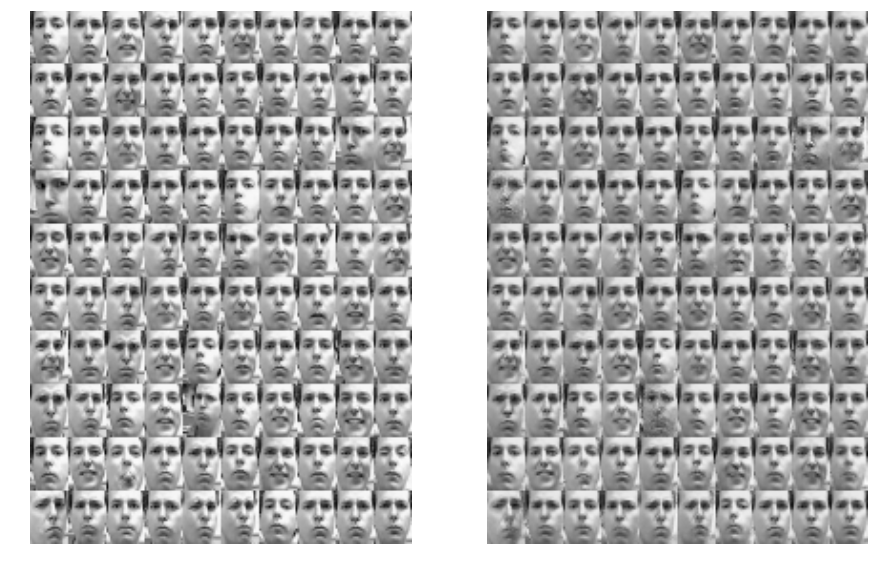

In [6]:
# randomly select a set number of training samples
num_grid = 10
shuffle = np.random.permutation(X_train.shape[0])
X_data = X_train[shuffle[:num_grid*num_grid]]

# get the generated images about the latent space where the training samples mapped to
samples = nntrainer.get_activations(sess, {'inputs': X_data}, layer='X')

# plot training samples and generated trainingsamples
fig = plt.figure()
ax = plt.subplot(1,2,1);
ax.imshow((X_data.reshape(num_grid, num_grid, 28, 20)
                   .transpose(0, 2, 1, 3)
                   .reshape(num_grid*28, num_grid*20)), cmap='gray')
ax.axis('off')
ax = plt.subplot(1,2,2);
ax.imshow((samples.reshape(num_grid, num_grid, 28, 20)
                   .transpose(0, 2, 1, 3)
                   .reshape(num_grid*28, num_grid*20)), cmap='gray')
ax.axis('off')
fig.set_size_inches(15,15)

# visualize the latent space learned by the VAE

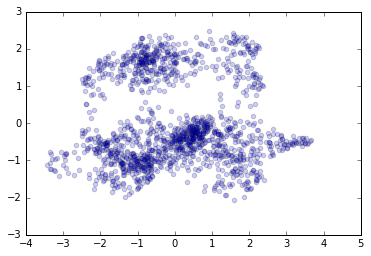

In [7]:
# extract latent space for training data
Z = nntrainer.get_activations(sess, {'inputs': X_train}, layer='Z_mu')

# perform PCA on latent space
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Z_reduce = pca.fit_transform(Z)

# plot reduced latent space
fig = plt.figure()
plt.scatter(Z_reduce[:,0], Z_reduce[:,1], alpha=0.2)